# Explore unified dataset

## Load and clean dataframe, and compute new columns

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataset_root = 'C:/DATASETS/AGE-FER'
dataset_labels_path = os.path.join(dataset_root, '24-datasets.csv')
dataset_imgs_path = os.path.join(dataset_root, 'images')

dtypes = {
    'dataset': 'category',
    'user_id': 'category',
    'name': str,
    'class': 'category',
    'age': 'Int8',
    'gender':'category' ,
    'race': 'category',
    'perspective': 'category',
    'age_group': 'category',
    'subset': 'category',
    'auto_age': bool,
    'auto_gender': bool,
    'auto_perspective': bool,
    'age_group_clean': 'category',
    'gaze': 'category',}

In [2]:
df = pd.read_csv(dataset_labels_path, dtype=dtypes, sep=',', quotechar='"')

# Change LIRIS dataset to LIRIS-CSE
df['dataset'] = df['dataset'].cat.rename_categories({'LIRIS':'LIRIS-CSE'})

# Change some dataset names
for old_name, new_name in zip(['LIRIS', 'EMOREACT', 'LIFESPAN', 'Google-FE-Test'], ['LIRIS-CSE', 'EmoReact', 'Lifespan', 'FE-Test']):
    df['dataset'] = df['dataset'].cat.rename_categories({old_name: new_name})

## Basic exploration

In [3]:
pd.set_option('display.max_rows', 10)
df

,dataset,user_id,name,class,age,gender,race,perspective,age_group,subset,auto_age,auto_gender,auto_perspective,age_group_clean,gaze
0,AffectNet,NaN,977_934736BB31B161BBDCCEF70484DDD76A62683731CA...,anger,45,male,NaN,front,NaN,NaN,True,True,True,middle-age,front
1,AffectNet,NaN,681_790C9D5516D0F3CF9EB560940312610E78DFEBF447...,anger,48,female,NaN,front,NaN,NaN,True,True,True,middle-age,front
2,AffectNet,NaN,814_EF32741B5DD39DE5A2EBC9D88FDA045B14B1C6BF2C...,anger,37,male,NaN,front,NaN,NaN,True,True,True,middle-age,front
3,AffectNet,NaN,891_F5FED292C640581211BC28466E9C105F0DEF3D1F8E...,anger,7,female,NaN,front,NaN,NaN,True,True,True,child,front
4,AffectNet,NaN,134_64A7E0A32E8D8BD8F15307FCF49DEE6D47A619C153...,anger,55,male,NaN,front,NaN,NaN,True,True,True,middle-age,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447298,WSEFEP,WSEFEP-24,PB_0001.jpg,neutral,21,male,caucasian,front,20-30,NaN,True,False,False,middle-age,front
447299,WSEFEP,WSEFEP-7,KA_0003.jpg,neutral,29,male,caucasian,front,20-30,NaN,True,False,False,middle-age,front
447300,WSEFEP,WSEFEP-28,RB_0006.jpg,neutral,25,male,caucasian,front,20-30,NaN,True,False,False,middle-age,front
447301,WSEFEP,WSEFEP-16,MK_0001.jpg,neutral,26,male,caucasian,front,20-30,NaN,True,False,False,middle-age,front


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447303 entries, 0 to 447302
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   dataset           447303 non-null  category
 1   user_id           35852 non-null   category
 2   name              447303 non-null  object  
 3   class             447303 non-null  category
 4   age               447303 non-null  Int8    
 5   gender            446984 non-null  category
 6   race              16083 non-null   category
 7   perspective       447303 non-null  category
 8   age_group         28589 non-null   category
 9   subset            33688 non-null   category
 10  auto_age          447303 non-null  bool    
 11  auto_gender       447303 non-null  bool    
 12  auto_perspective  447303 non-null  bool    
 13  age_group_clean   447303 non-null  category
 14  gaze              447303 non-null  category
dtypes: Int8(1), bool(3), category(10), object(1)
memory

In [5]:
print(df.describe())

             age
count   447303.0
mean   32.508286
std    16.149654
min          0.0
25%         23.0
50%         30.0
75%         41.0
max         93.0


In [6]:
for column in df.select_dtypes(include='category').columns:
    print(f"Unique values in {column}: {df[column].nunique()}")

Unique values in dataset: 24
Unique values in user_id: 2063
Unique values in class: 7
Unique values in gender: 2
Unique values in race: 6
Unique values in perspective: 3
Unique values in age_group: 9
Unique values in subset: 3
Unique values in age_group_clean: 3
Unique values in gaze: 4


In [7]:
for column in df.select_dtypes(include='category').columns:
    print(f"\nValue counts for {column}:\n{df[column].value_counts()}")


Value counts for dataset:
dataset
AffectNet     257168
ExpW           91758
FER2013        35885
RAF-DB         15336
ElderReact     11565
               ...  
NIMH-ChEFS       533
DEFSS            404
JAFFE            213
WSEFEP           211
FE-Test          210
Name: count, Length: 24, dtype: int64

Value counts for user_id:
user_id
ElderReact-37    530
ElderReact-15    524
ElderReact-1     505
ElderReact-32    505
ElderReact-8     485
                ... 
LIFESPAN-741       1
LIFESPAN-742       1
LIFESPAN-743       1
LIFESPAN-744       1
LIFESPAN-684       1
Name: count, Length: 2063, dtype: int64

Value counts for class:
class
happiness    181319
neutral      117652
sadness       45964
anger         37031
surprise      33587
fear          17038
disgust       14712
Name: count, dtype: int64

Value counts for gender:
gender
female    229998
male      216986
Name: count, dtype: int64

Value counts for race:
race
caucasian    14394
arab          1134
asian          237
black         

## Charts

### Datasets

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\679297047.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, datasets_counts[i], datasets_counts[i], ha='center', va='bottom', fontdict={'fontsize':12}, rotation=50)


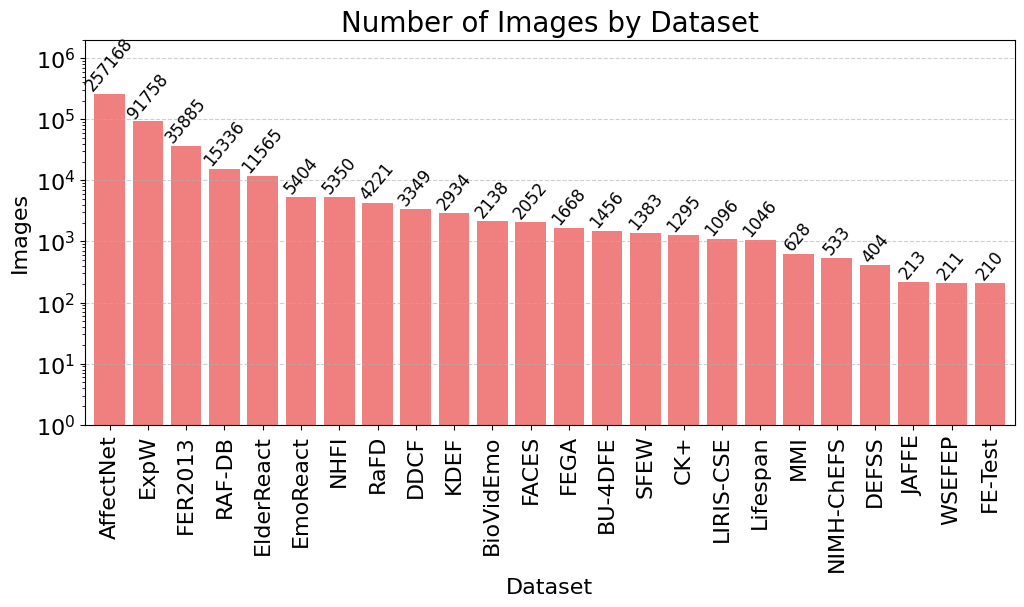

,Number of Images
dataset,
AffectNet,257168
ExpW,91758
FER2013,35885
RAF-DB,15336
ElderReact,11565
EmoReact,5404
NHFI,5350
RaFD,4221
DDCF,3349


In [8]:
# plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 16

excluded_datasets = []

# Filter the DataFrame to exclude 'AffectNet' and 'FER2013' datasets
filtered_df = df[~df['dataset'].isin(excluded_datasets)]

# Group by 'dataset' and count unique users
datasets_counts = filtered_df["dataset"].value_counts()
datasets_counts = datasets_counts.drop(excluded_datasets)

# Plotting
datasets_counts.plot(kind='bar', color='lightcoral', width=0.8, figsize=(12, 5), log=True)

# Add values on top of the bars
for i in range(len(datasets_counts)):
    plt.text(i, datasets_counts[i], datasets_counts[i], ha='center', va='bottom', fontdict={'fontsize':12}, rotation=50)

# Set max y (not needed for log scale)
# plt.ylim(0, datasets_counts.max() + 35000)

# Set secondary y-ticks to every 2000 (not needed for log scale)
# plt.yticks(range(0, datasets_counts.max() + 35000, 20000))

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.title('Number of Images by Dataset', fontsize=20)
plt.xlabel('Dataset')
plt.ylabel('Images')
plt.ylim(1, 2e6)
plt.show()

# Convert to dataframe and show
pd.set_option('display.max_rows', 30)
datasets_counts_df = datasets_counts.to_frame()
datasets_counts_df.columns = ['Number of Images']
datasets_counts_df

### Age

#### Age distribution

In [9]:
# Count number of images without age
no_age = df['age'].isna().sum()
print(f"Number of images without age: {no_age}")

Number of images without age: 0


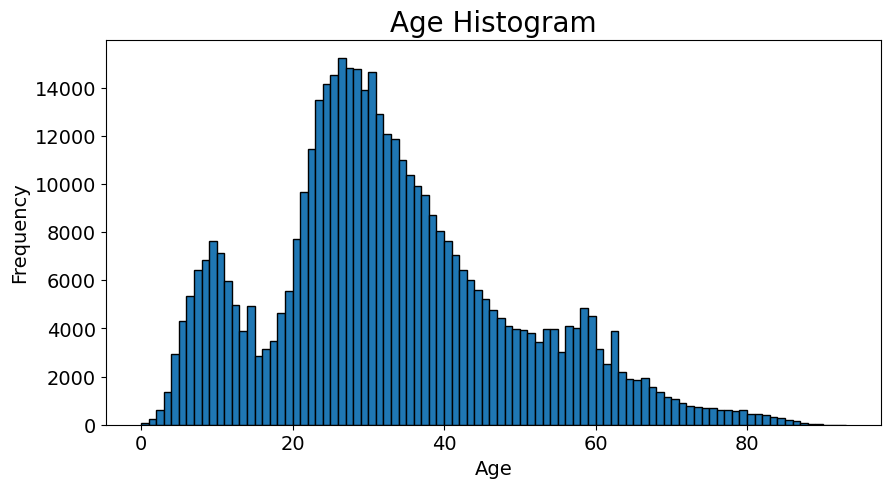

In [10]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 14
df['age'].plot(kind='hist', bins=df['age'].max(), edgecolor='black')
plt.title('Age Histogram', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Print percentage of images with images between 20 and 40 age
age_20_40 = df['age'].between(60, 100).sum()
total_images = df['age'].count()
percentage = age_20_40 / total_images * 100
print(f"Percentage of images with age between 20 and 40: {percentage:.2f}%")

Percentage of images with age between 20 and 40: 6.96%


#### By age groups

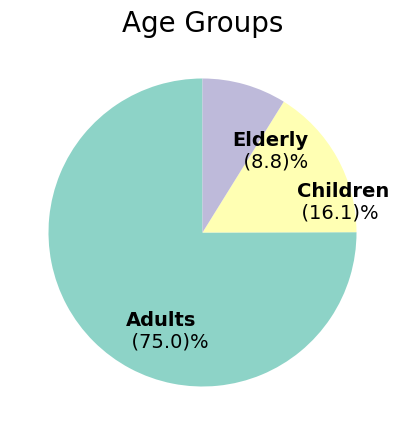

In [12]:
# Count the occurrences of each age group in the new 'age_group_clean' column
age_group_clean_counts = df['age_group_clean'].value_counts(dropna=False)
plt.rcParams.update({'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Plotting a pie chart with increased font size
plt.rcParams['font.size'] = 14
plt.figure(figsize=(5,5))

# Plotting the pie chart, with values and labels shown under the slices
# plt.pie(age_group_clean_counts, startangle=90, colors=plt.cm.Set3.colors)
a,b,c = plt.pie(age_group_clean_counts, labels=[f'\n{l}' for l in ['Adults', 'Children', 'Elderly']], center=[1,0], pctdistance=.7, labeldistance=.7, autopct=lambda p: f'\n\n\n              ({p:.1f})%', startangle=90, colors=plt.cm.Set3.colors)

plt.setp(b, weight='bold')
plt.title('Age Groups', fontsize=20)
plt.show()

Which datasets and how many images are there in every group:

In [13]:
counts = df[df['age_group_clean'] == 'child']['dataset'].value_counts()
counts_df = counts.reset_index(name='Child')

counts = df[df['age_group_clean'] == 'elder']['dataset'].value_counts()
counts_df2 = counts.reset_index(name='Elder')

# Merge the two dataframes using the 'dataset' column as the key
merged_df = pd.merge(counts_df, counts_df2, on='dataset', how='outer')

pd.set_option('display.max_rows', 30)
merged_df

,dataset,Child,Elder
0,AffectNet,36933,19255
1,BU-4DFE,0,0
2,BioVidEmo,0,400
3,CK+,148,0
4,DDCF,3349,0
5,DEFSS,270,0
6,EmoReact,5404,0
7,ElderReact,0,11565
8,ExpW,11904,5016
9,FACES,0,684


In [14]:
pd.set_option('display.max_rows', 10)

Copy images of elderly and children to subfolders for exploration:

In [15]:
# Copy all images of elderly people to a new folder
# for group in ['elder', 'child']:
#     new_folder = os.path.join(dataset_root, 'images-'+group)
#     if not os.path.exists(new_folder):
#         os.mkdir(new_folder)
#     for _, row in tqdm(df[df['age_group_clean'] == group].iterrows()):
#         img_path = os.path.join(dataset_imgs_path, row['name'])
#         new_img_path = os.path.join(new_folder, row['dataset'] + '_' + row['class'] + '_' + str(row['age']) + '_' + ('auto' if row['auto_age'] else 'manual') + '_' + row['name'])
#         shutil.copyfile(img_path, new_img_path)

#### Number of null, auto and manual age records per dataset

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\788586243.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  null_age_counts = filtered_df[filtered_df['age'].isnull() & filtered_df['age_group_clean'].isnull()].groupby('dataset').size()
C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\788586243.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  automatic_age_counts = filtered_df[filtered_df['auto_age'] & ~filtered_df['age'].isnull() & filtered_df['age_group'].isnull()].groupby('dataset').size()
C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\788586243.py:16: FutureWarning: The default of observed=False is depr

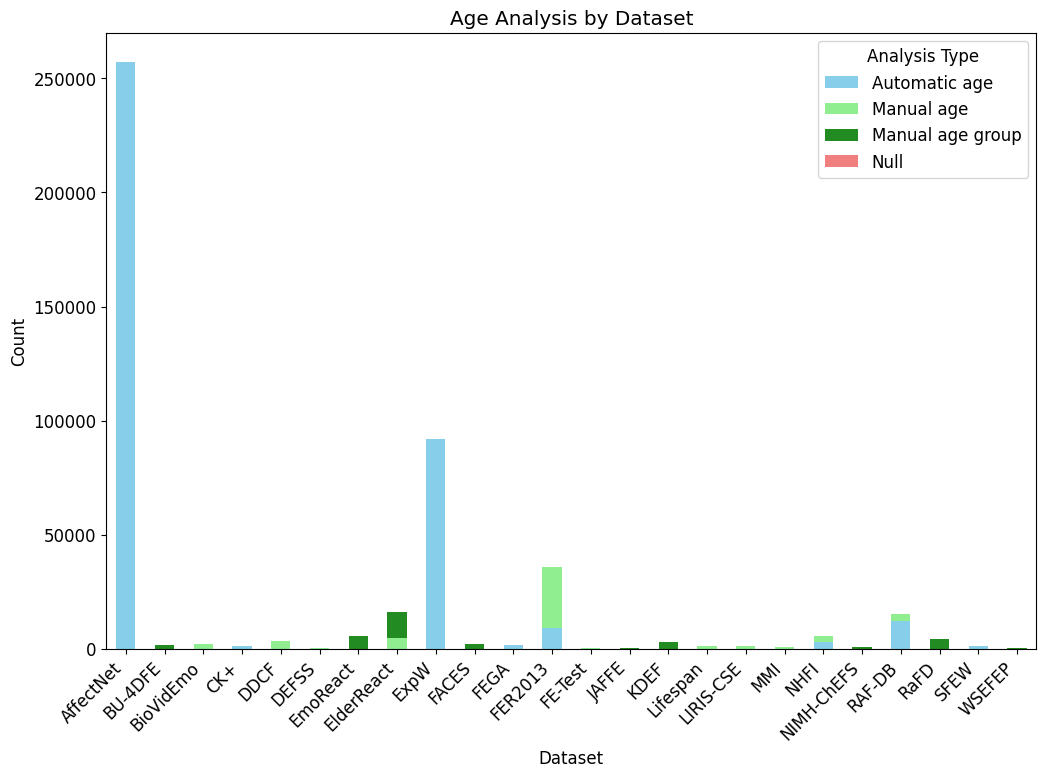

In [16]:
# Set default font size and background color for the plot
plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

excluded_datasets = []

# Filter the DataFrame
filtered_df = df[~df['dataset'].isin(excluded_datasets)]

# Null age and age_group. 
null_age_counts = filtered_df[filtered_df['age'].isnull() & filtered_df['age_group_clean'].isnull()].groupby('dataset').size()

# Automatic age.
automatic_age_counts = filtered_df[filtered_df['auto_age'] & ~filtered_df['age'].isnull() & filtered_df['age_group'].isnull()].groupby('dataset').size()

# Manual age.
manual_age_counts = filtered_df[~filtered_df['auto_age'] & ~filtered_df['age'].isnull()].groupby('dataset').size()

# Manual age group.
manual_age_group_counts = filtered_df[~filtered_df['age_group'].isnull()].groupby('dataset').size()

# Combine the counts into a DataFrame
age_analysis_df = pd.DataFrame({
    'Automatic age': automatic_age_counts,
    'Manual age': manual_age_counts,
    'Manual age group': manual_age_group_counts,
    'Null': null_age_counts
})
age_analysis_df = age_analysis_df.drop(excluded_datasets, axis='rows')

# Plot the data in a single stacked bar plot
ax = age_analysis_df.plot.bar(stacked=True, figsize=(12, 8), color=['skyblue', 'lightgreen', 'forestgreen', 'lightcoral'])
plt.title('Age Analysis by Dataset')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Analysis Type')
plt.show()

In [17]:
pd.set_option('display.max_rows', None)
age_analysis_df

,Automatic age,Manual age,Manual age group,Null
dataset,,,,
AffectNet,257168,0,0,0
BU-4DFE,0,0,1456,0
BioVidEmo,0,2138,0,0
CK+,1295,0,0,0
DDCF,0,3349,0,0
DEFSS,0,404,0,0
EmoReact,0,0,5404,0
ElderReact,0,4642,11565,0
ExpW,91758,0,0,0


### Gender

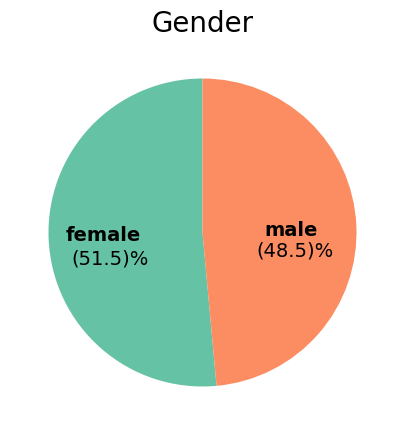

In [18]:
# Count the occurrences of each gender in the 'gender' column
age_group_clean_counts = df['gender'].value_counts(dropna=True)
plt.rcParams.update({'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Plotting a pie chart with increased font size
plt.rcParams['font.size'] = 14
plt.figure(figsize=(10, 5))
a, b, c = plt.pie(age_group_clean_counts, labels=age_group_clean_counts.index, labeldistance=.4, autopct=lambda p: f'\n\n({p:.1f})%', startangle=90, colors=plt.cm.Set2.colors)
plt.setp(b, weight='bold')
plt.title('Gender', fontsize=20)
plt.show()

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\62761850.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts_by_dataset = df.groupby(['dataset', 'gender']).size().unstack(fill_value=0)
C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\62761850.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts_by_dataset = df.groupby(['dataset', 'age_group_clean']).size().unstack(fill_value=0)


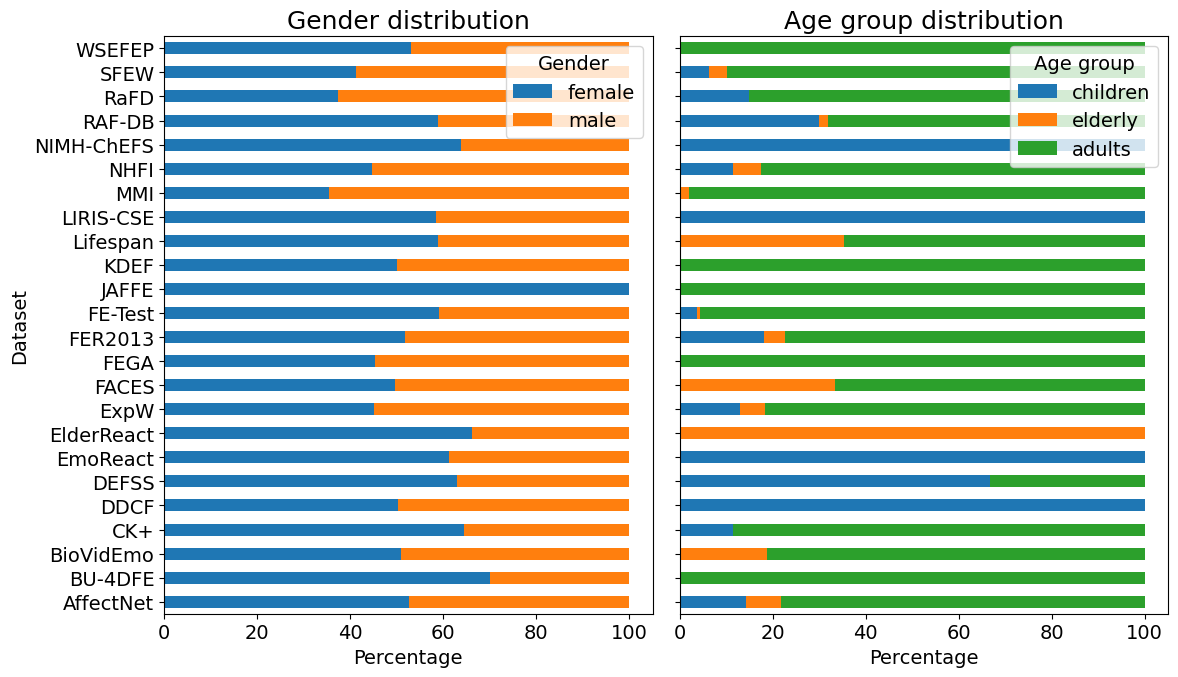

,dataset,female,male,child,elder,middle-age
13,JAFFE,100.000000,0.000000,0.000000,0.000000,100.000000
1,BU-4DFE,69.986264,30.013736,0.000000,0.000000,100.000000
7,ElderReact,66.104626,33.895374,0.000000,100.000000,0.000000
3,CK+,64.380165,35.619835,11.428571,0.000000,88.571429
19,NIMH-ChEFS,63.789869,36.210131,100.000000,0.000000,0.000000
5,DEFSS,62.871287,37.128713,66.831683,0.000000,33.168317
6,EmoReact,61.160542,38.839458,100.000000,0.000000,0.000000
12,FE-Test,59.047619,40.952381,3.809524,0.476190,95.714286
20,RAF-DB,58.946270,41.053730,29.955660,1.845331,68.199009
15,Lifespan,58.891013,41.108987,0.000000,35.277247,64.722753


In [19]:
# Count the occurrences of each gender in each dataset
gender_counts_by_dataset = df.groupby(['dataset', 'gender']).size().unstack(fill_value=0)

# Calculate the percentage of each gender in each dataset
gender_percentage_by_dataset = gender_counts_by_dataset.div(gender_counts_by_dataset.sum(axis=1), axis=0) * 100

# Count the occurrences of each age_group in each dataset
age_group_counts_by_dataset = df.groupby(['dataset', 'age_group_clean']).size().unstack(fill_value=0)

# Calculate the percentage of each gender in each dataset
age_group_percentage_by_dataset = age_group_counts_by_dataset.div(age_group_counts_by_dataset.sum(axis=1), axis=0) * 100

# Convert gender and age counts to dataframes
gender_counts_df = gender_percentage_by_dataset.reset_index()
age_group_counts_df = age_group_percentage_by_dataset.reset_index()

# Merge the dataframes by dataset
merged_counts_df = pd.merge(gender_counts_df, age_group_counts_df, on='dataset', suffixes=('_gender', '_age_group'))

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7), sharey=True)

# Plot gender percentages
gender_counts_df.plot(x='dataset', kind='barh', stacked=True, ax=axes[0])
axes[0].set_title('Gender distribution', fontsize=18)
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Dataset')
axes[0].legend(title='Gender', loc='upper right')

# Plot age group percentages
age_group_counts_df.plot(x='dataset', kind='barh', stacked=True, ax=axes[1])
axes[1].set_title('Age group distribution', fontsize=18)
axes[1].set_xlabel('Percentage')
axes[1].legend(title='Age group', loc='upper right', labels=['children', 'elderly', 'adults'])

plt.tight_layout()
plt.show()

# Display the merged dataframe. Sort by female percentage in descending order
merged_counts_df = merged_counts_df.sort_values(by='female', ascending=False)
merged_counts_df

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\2507088179.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts_by_dataset = df.groupby(['dataset', 'gender']).size().unstack(fill_value=0)
C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\2507088179.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts_by_dataset = df.groupby(['dataset', 'age_group_clean']).size().unstack(fill_value=0)


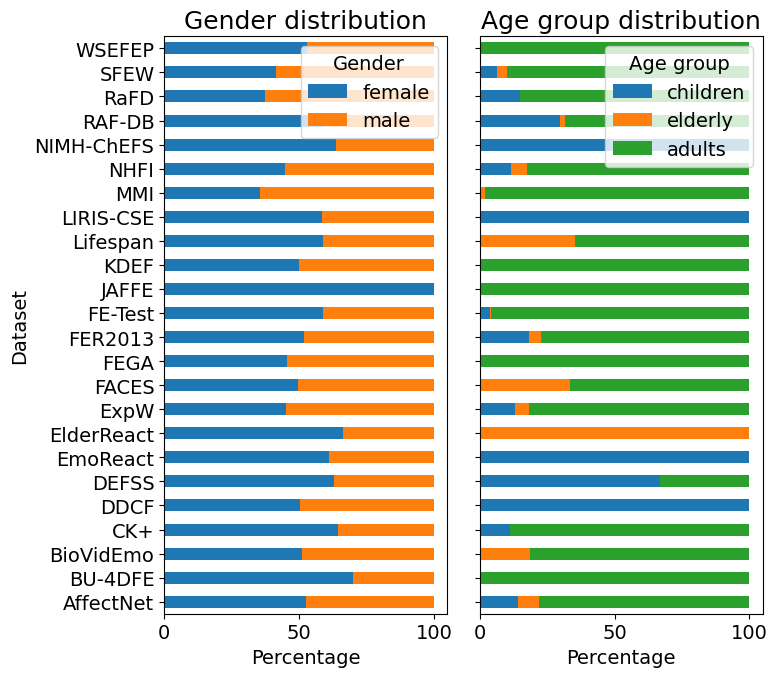

,dataset,female,male,child,elder,middle-age
13,JAFFE,100.000000,0.000000,0.000000,0.000000,100.000000
1,BU-4DFE,69.986264,30.013736,0.000000,0.000000,100.000000
7,ElderReact,66.104626,33.895374,0.000000,100.000000,0.000000
3,CK+,64.380165,35.619835,11.428571,0.000000,88.571429
19,NIMH-ChEFS,63.789869,36.210131,100.000000,0.000000,0.000000
5,DEFSS,62.871287,37.128713,66.831683,0.000000,33.168317
6,EmoReact,61.160542,38.839458,100.000000,0.000000,0.000000
12,FE-Test,59.047619,40.952381,3.809524,0.476190,95.714286
20,RAF-DB,58.946270,41.053730,29.955660,1.845331,68.199009
15,Lifespan,58.891013,41.108987,0.000000,35.277247,64.722753


In [20]:
# Count the occurrences of each gender in each dataset
gender_counts_by_dataset = df.groupby(['dataset', 'gender']).size().unstack(fill_value=0)

# Calculate the percentage of each gender in each dataset
gender_percentage_by_dataset = gender_counts_by_dataset.div(gender_counts_by_dataset.sum(axis=1), axis=0) * 100

# Count the occurrences of each age_group in each dataset
age_group_counts_by_dataset = df.groupby(['dataset', 'age_group_clean']).size().unstack(fill_value=0)

# Calculate the percentage of each gender in each dataset
age_group_percentage_by_dataset = age_group_counts_by_dataset.div(age_group_counts_by_dataset.sum(axis=1), axis=0) * 100

# Convert gender and age counts to dataframes
gender_counts_df = gender_percentage_by_dataset.reset_index()
age_group_counts_df = age_group_percentage_by_dataset.reset_index()

# Merge the dataframes by dataset
merged_counts_df = pd.merge(gender_counts_df, age_group_counts_df, on='dataset', suffixes=('_gender', '_age_group'))

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 7), sharey=True)

# Plot gender percentages
gender_counts_df.plot(x='dataset', kind='barh', stacked=True, ax=axes[0])
axes[0].set_title('Gender distribution', fontsize=18)
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Dataset')
axes[0].legend(title='Gender', loc='upper right')

# Plot age group percentages
age_group_counts_df.plot(x='dataset', kind='barh', stacked=True, ax=axes[1])
axes[1].set_title('Age group distribution', fontsize=18)
axes[1].set_xlabel('Percentage')
axes[1].legend(title='Age group', loc='upper right', labels=['children', 'elderly', 'adults'])

plt.tight_layout()
plt.show()

# Display the merged dataframe. Sort by female percentage in descending order
merged_counts_df = merged_counts_df.sort_values(by='female', ascending=False)
merged_counts_df

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\2205694150.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts_by_dataset = df.groupby(['dataset', 'gender']).size().unstack(fill_value=0)
C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\2205694150.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts_by_dataset = df.groupby(['dataset', 'age_group_clean']).size().unstack(fill_value=0)


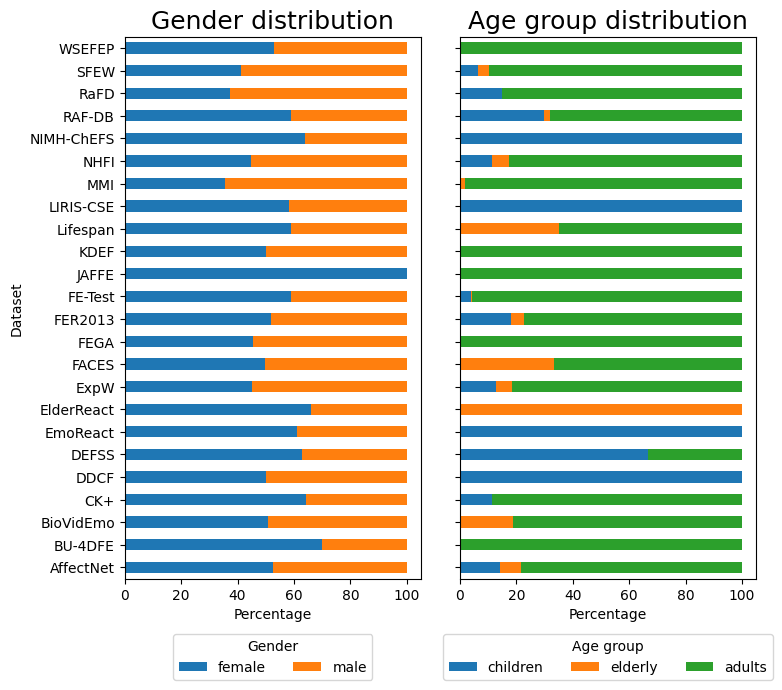

,dataset,female,male,child,elder,middle-age
13,JAFFE,100.000000,0.000000,0.000000,0.000000,100.000000
1,BU-4DFE,69.986264,30.013736,0.000000,0.000000,100.000000
7,ElderReact,66.104626,33.895374,0.000000,100.000000,0.000000
3,CK+,64.380165,35.619835,11.428571,0.000000,88.571429
19,NIMH-ChEFS,63.789869,36.210131,100.000000,0.000000,0.000000
5,DEFSS,62.871287,37.128713,66.831683,0.000000,33.168317
6,EmoReact,61.160542,38.839458,100.000000,0.000000,0.000000
12,FE-Test,59.047619,40.952381,3.809524,0.476190,95.714286
20,RAF-DB,58.946270,41.053730,29.955660,1.845331,68.199009
15,Lifespan,58.891013,41.108987,0.000000,35.277247,64.722753


In [56]:
# Count the occurrences of each gender in each dataset
gender_counts_by_dataset = df.groupby(['dataset', 'gender']).size().unstack(fill_value=0)

# Calculate the percentage of each gender in each dataset
gender_percentage_by_dataset = gender_counts_by_dataset.div(gender_counts_by_dataset.sum(axis=1), axis=0) * 100

# Count the occurrences of each age_group in each dataset
age_group_counts_by_dataset = df.groupby(['dataset', 'age_group_clean']).size().unstack(fill_value=0)

# Calculate the percentage of each gender in each dataset
age_group_percentage_by_dataset = age_group_counts_by_dataset.div(age_group_counts_by_dataset.sum(axis=1), axis=0) * 100

# Convert gender and age counts to dataframes
gender_counts_df = gender_percentage_by_dataset.reset_index()
age_group_counts_df = age_group_percentage_by_dataset.reset_index()

# Merge the dataframes by dataset
merged_counts_df = pd.merge(gender_counts_df, age_group_counts_df, on='dataset', suffixes=('_gender', '_age_group'))

# Plotting
plt.rcParams['font.size'] = 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 7), sharey=True)

# Plot gender percentages
gender_counts_df.plot(x='dataset', kind='barh', stacked=True, ax=axes[0])
axes[0].set_title('Gender distribution', fontsize=18)
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Dataset')
axes[0].legend(title='Gender', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Plot age group percentages
age_group_counts_df.plot(x='dataset', kind='barh', stacked=True, ax=axes[1])
axes[1].set_title('Age group distribution', fontsize=18)
axes[1].set_xlabel('Percentage')
axes[1].legend(title='Age group', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, labels=['children', 'elderly', 'adults'])

plt.tight_layout()
plt.show()

# Display the merged dataframe. Sort by female percentage in descending order
merged_counts_df = merged_counts_df.sort_values(by='female', ascending=False)
merged_counts_df

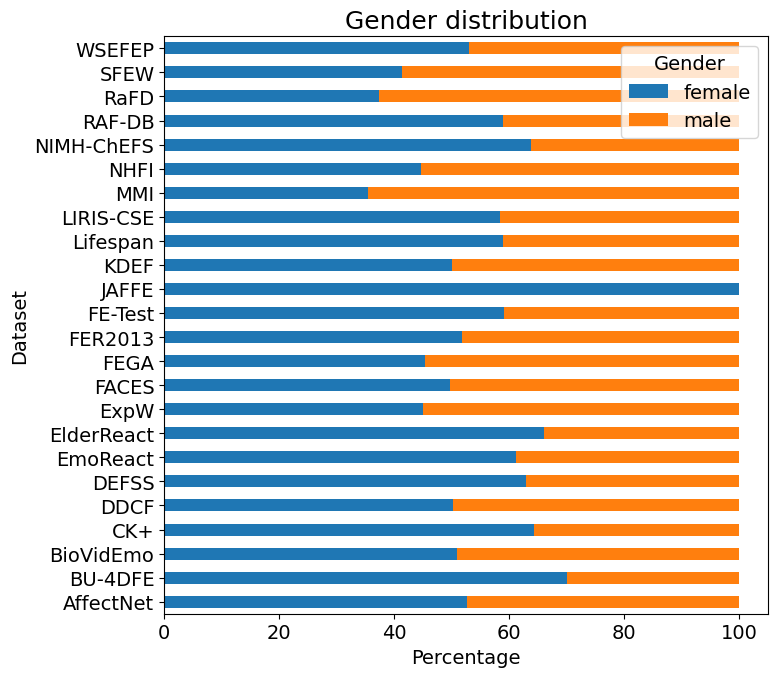

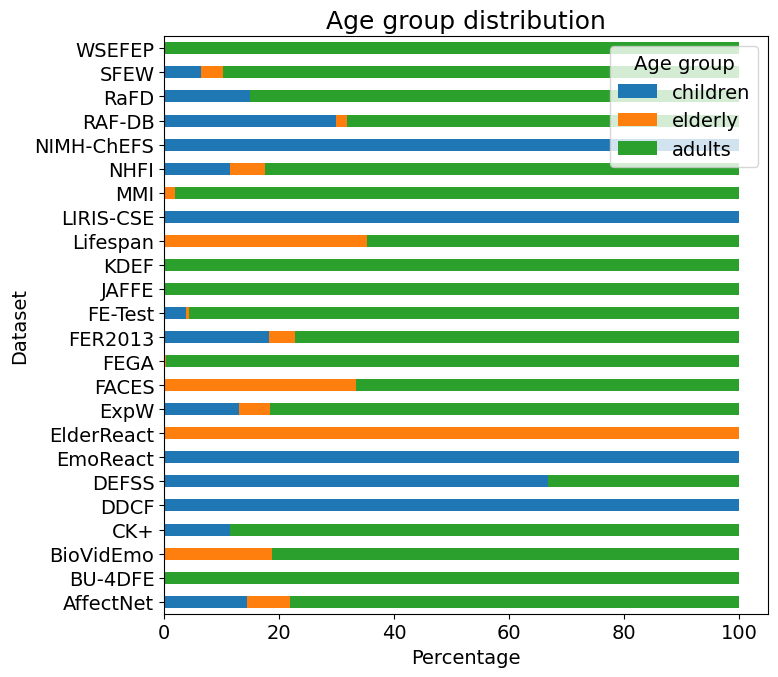

,dataset,female,male,child,elder,middle-age
13,JAFFE,100.000000,0.000000,0.000000,0.000000,100.000000
1,BU-4DFE,69.986264,30.013736,0.000000,0.000000,100.000000
7,ElderReact,66.104626,33.895374,0.000000,100.000000,0.000000
3,CK+,64.380165,35.619835,11.428571,0.000000,88.571429
19,NIMH-ChEFS,63.789869,36.210131,100.000000,0.000000,0.000000
5,DEFSS,62.871287,37.128713,66.831683,0.000000,33.168317
6,EmoReact,61.160542,38.839458,100.000000,0.000000,0.000000
12,FE-Test,59.047619,40.952381,3.809524,0.476190,95.714286
20,RAF-DB,58.946270,41.053730,29.955660,1.845331,68.199009
15,Lifespan,58.891013,41.108987,0.000000,35.277247,64.722753


In [21]:
# Plotting gender percentages
fig_gender, ax_gender = plt.subplots(figsize=(8, 7))
gender_counts_df.plot(x='dataset', kind='barh', stacked=True, ax=ax_gender)
ax_gender.set_title('Gender distribution', fontsize=18)
ax_gender.set_xlabel('Percentage')
ax_gender.set_ylabel('Dataset')
ax_gender.legend(title='Gender', loc='upper right')

plt.tight_layout()
plt.show()

# Plotting age group percentages
fig_age_group, ax_age_group = plt.subplots(figsize=(8, 7))
age_group_counts_df.plot(x='dataset', kind='barh', stacked=True, ax=ax_age_group)
ax_age_group.set_title('Age group distribution', fontsize=18)
ax_age_group.set_xlabel('Percentage')
ax_age_group.set_ylabel('Dataset')
ax_age_group.legend(title='Age group', loc='upper right', labels=['children', 'elderly', 'adults'])

plt.tight_layout()
plt.show()

# Display the merged dataframe. Sort by female percentage in descending order
merged_counts_df = merged_counts_df.sort_values(by='female', ascending=False)
merged_counts_df

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\3024929032.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  null_gender_counts = filtered_df[filtered_df['gender'].isnull()].groupby('dataset').size()
C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\3024929032.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_null_auto_true_counts = filtered_df[filtered_df['auto_gender'] & ~filtered_df['gender'].isnull()].groupby('dataset').size()
C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\3024929032.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of 

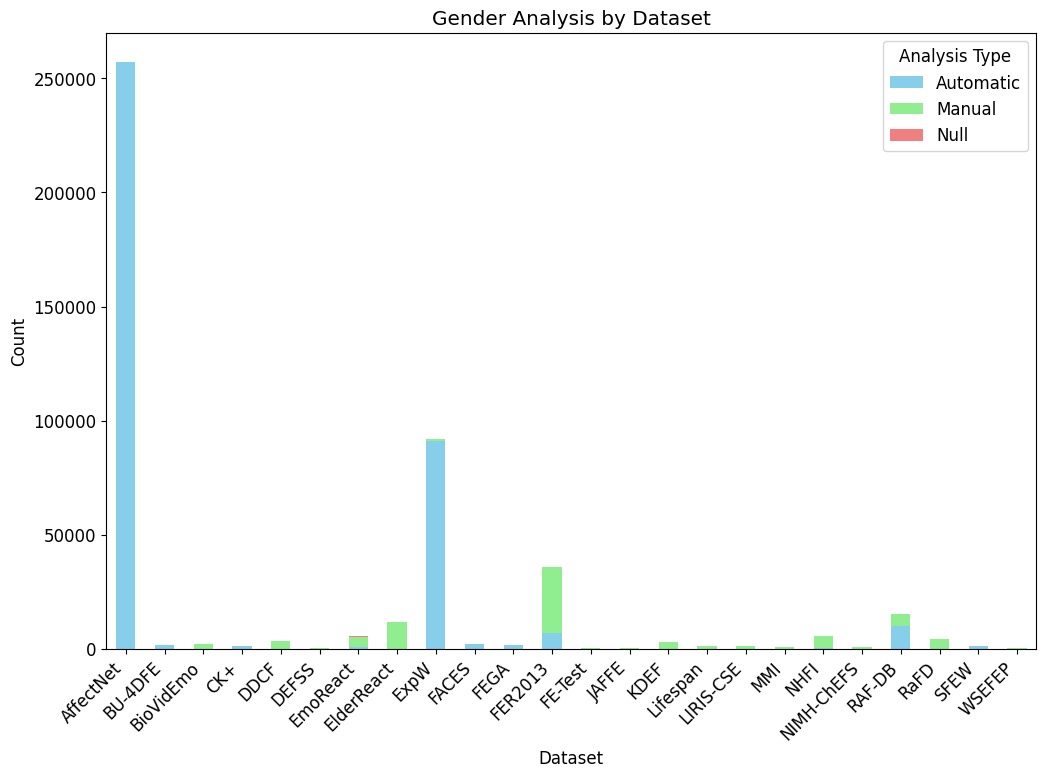

In [22]:
# Set default font size and background color for the plot
plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

excluded_datasets = []
# excluded_datasets = ['AffectNet', 'FER2013']
# excluded_datasets = ['AffectNet', 'FER2013', 'EMOREACT', 'ElderReact']

# Filter the DataFrame
filtered_df = df[~df['dataset'].isin(excluded_datasets)]

# Step 1: Number of rows with null values for the 'gender' column by dataset
null_gender_counts = filtered_df[filtered_df['gender'].isnull()].groupby('dataset').size()

# Step 2: Number of rows with non-null values for the 'gender' where 'auto_gender' is true by dataset
non_null_auto_true_counts = filtered_df[filtered_df['auto_gender'] & ~filtered_df['gender'].isnull()].groupby('dataset').size()

# Step 3: Number of rows with non-null values for the 'gender' where 'auto_gender' is false by dataset
non_null_auto_false_counts = filtered_df[~filtered_df['auto_gender'] & ~filtered_df['gender'].isnull()].groupby('dataset').size()

# Combine the counts into a DataFrame
gender_analysis_df = pd.DataFrame({
    'Automatic': non_null_auto_true_counts,
    'Manual': non_null_auto_false_counts,
    'Null': null_gender_counts
})
gender_analysis_df = gender_analysis_df.drop(excluded_datasets, axis='rows')

# Plot the data in a single stacked bar plot
ax = gender_analysis_df.plot.bar(stacked=True, figsize=(12, 8), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Gender Analysis by Dataset')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Analysis Type')
plt.show()

In [23]:
pd.set_option('display.max_rows', None)
gender_analysis_df

,Automatic,Manual,Null
dataset,,,
AffectNet,257168,0,0
BU-4DFE,1456,0,0
BioVidEmo,0,2138,0
CK+,1210,0,85
DDCF,0,3349,0
DEFSS,0,404,0
EmoReact,712,4458,234
ElderReact,0,11565,0
ExpW,91233,525,0


### Users

#### Number of users per dataset

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\242837978.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_counts = df.groupby('dataset')['user_id'].nunique()


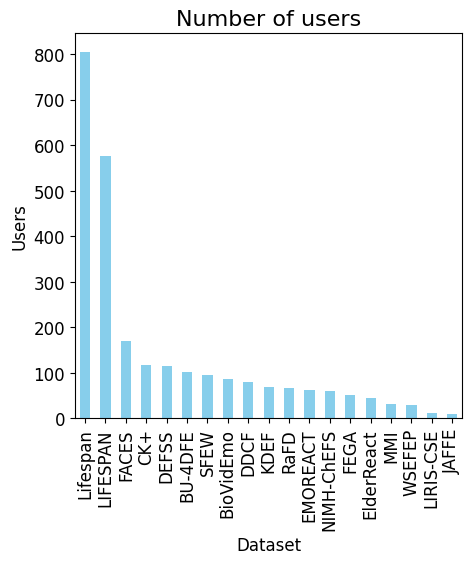

dataset
Lifespan      805
LIFESPAN      576
FACES         171
CK+           118
DEFSS         116
BU-4DFE       101
SFEW           95
BioVidEmo      86
DDCF           80
KDEF           70
RaFD           67
EMOREACT       63
NIMH-ChEFS     60
FEGA           51
ElderReact     46
MMI            32
WSEFEP         30
LIRIS-CSE      12
JAFFE          10
Name: user_id, dtype: int64

In [24]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['font.size'] = 12

# Group by 'dataset' and count unique users
user_counts = df.groupby('dataset')['user_id'].nunique()

# Manually fix those that we know are wrong (user labels are not clear for all datasets)
user_counts['LIFESPAN'] = 576
user_counts['SFEW'] = 95
user_counts['EMOREACT'] = 63
user_counts['ElderReact'] = 46

# Drop datasets with no users
user_counts = user_counts[user_counts > 0]

# Sort
user_counts = user_counts.sort_values(ascending=False)

# Plotting
user_counts.plot.bar(color='skyblue')
plt.title('Number of users', fontsize=16)
plt.xlabel('Dataset')
plt.ylabel('Users')
plt.show()

user_counts

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\3740392608.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_counts = df.groupby('dataset')['user_id'].nunique()


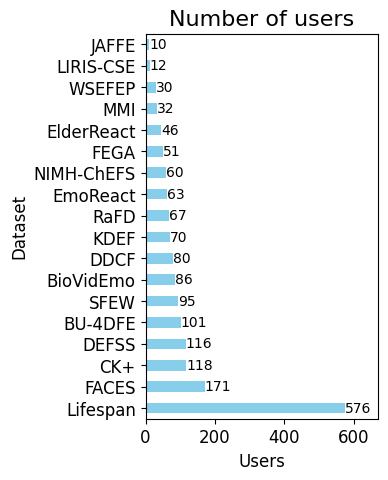

dataset
Lifespan      576
FACES         171
CK+           118
DEFSS         116
BU-4DFE       101
SFEW           95
BioVidEmo      86
DDCF           80
KDEF           70
RaFD           67
EmoReact       63
NIMH-ChEFS     60
FEGA           51
ElderReact     46
MMI            32
WSEFEP         30
LIRIS-CSE      12
JAFFE          10
Name: user_id, dtype: int64

In [55]:
plt.rcParams['figure.figsize'] = [3, 5]
plt.rcParams['font.size'] = 12

# Group by 'dataset' and count unique users
user_counts = df.groupby('dataset')['user_id'].nunique()

# Manually fix those that we know are wrong (user labels are not clear for all datasets)
user_counts['Lifespan'] = 576
user_counts['SFEW'] = 95
user_counts['EmoReact'] = 63
user_counts['ElderReact'] = 46

# Drop datasets with no users
user_counts = user_counts[user_counts > 0]

# Sort
user_counts = user_counts.sort_values(ascending=False)

# Plotting
ax = user_counts.plot.barh(color='skyblue')
plt.title('Number of users', fontsize=16)
plt.xlabel('Users')
plt.ylabel('Dataset')
ax.set_xlim(0, 670)  # Set x-axis limit

# Add values to the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', fontsize=10)

plt.show()

user_counts

#### Average number of images per user per dataset

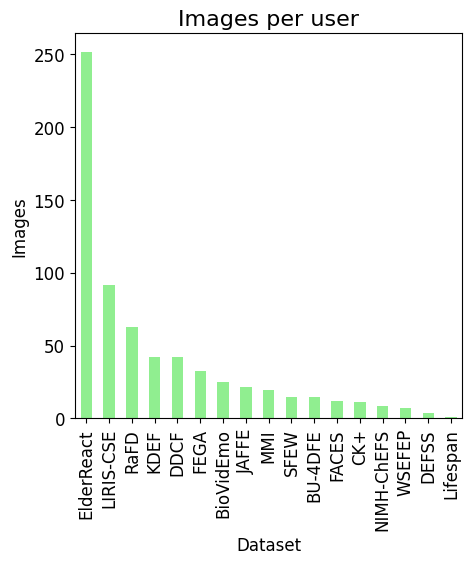

dataset
ElderReact    251.413043
LIRIS-CSE      91.333333
RaFD           63.000000
KDEF           41.914286
DDCF           41.862500
FEGA           32.705882
BioVidEmo      24.860465
JAFFE          21.300000
MMI            19.625000
SFEW           14.557895
BU-4DFE        14.415842
FACES          12.000000
CK+            10.974576
NIMH-ChEFS      8.883333
WSEFEP          7.033333
DEFSS           3.482759
Lifespan        1.299379
dtype: float64

In [26]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['font.size'] = 12

# Average taking number of images / number of users
# Group by 'dataset' and count the number of images
average_images_per_user = df['dataset'].value_counts() / user_counts

# Drop datasets with no users
average_images_per_user = average_images_per_user.dropna()

# Sort
average_images_per_user = average_images_per_user.sort_values(ascending=False)

# Plotting
average_images_per_user.plot.bar(color='lightgreen')
plt.title('Images per user', fontsize=16)
plt.xlabel('Dataset')
plt.ylabel('Images')
plt.show()

average_images_per_user

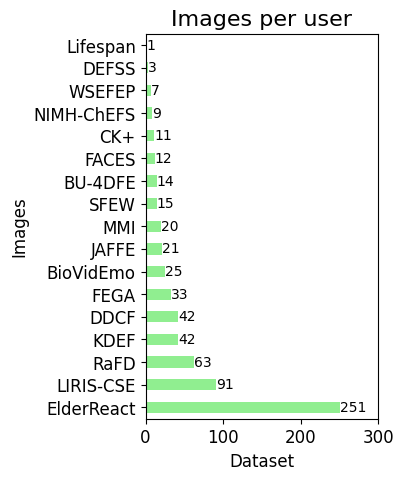

dataset
ElderReact    251.413043
LIRIS-CSE      91.333333
RaFD           63.000000
KDEF           41.914286
DDCF           41.862500
FEGA           32.705882
BioVidEmo      24.860465
JAFFE          21.300000
MMI            19.625000
SFEW           14.557895
BU-4DFE        14.415842
FACES          12.000000
CK+            10.974576
NIMH-ChEFS      8.883333
WSEFEP          7.033333
DEFSS           3.482759
Lifespan        1.299379
dtype: float64

In [54]:
plt.rcParams['figure.figsize'] = [3, 5]
plt.rcParams['font.size'] = 12

# Average with equal weight per user:
# # Group by 'user_id' and 'dataset' and count the number of images
# user_dataset_count = df.groupby(['user_id', 'dataset']).size().reset_index(name='num_images')

# # Exclude rows where count is 0
# user_dataset_count = user_dataset_count[user_dataset_count['num_images'] > 0]

# # Calculate the average number of images per user for each dataset
# average_images_per_user = user_dataset_count.groupby('dataset')['num_images'].mean().sort_values(ascending=False)

# Average taking number of images / number of users
# Group by 'dataset' and count the number of images
average_images_per_user = df['dataset'].value_counts() / user_counts

# Drop datasets with no users
average_images_per_user = average_images_per_user.dropna()

# Sort
average_images_per_user = average_images_per_user.sort_values(ascending=False)

# Plotting
ax = average_images_per_user.plot.barh(color='lightgreen')
plt.title('Images per user', fontsize=16)
plt.xlabel('Dataset')
plt.ylabel('Images')
ax.set_xlim(0, 300)  # Set x-axis limit

# Add values to the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', fontsize=10)

plt.show()

average_images_per_user

### Classes

#### By dataset

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\3785819960.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.dropna(subset=['class', 'dataset']).groupby(['class', 'dataset']).size().unstack()


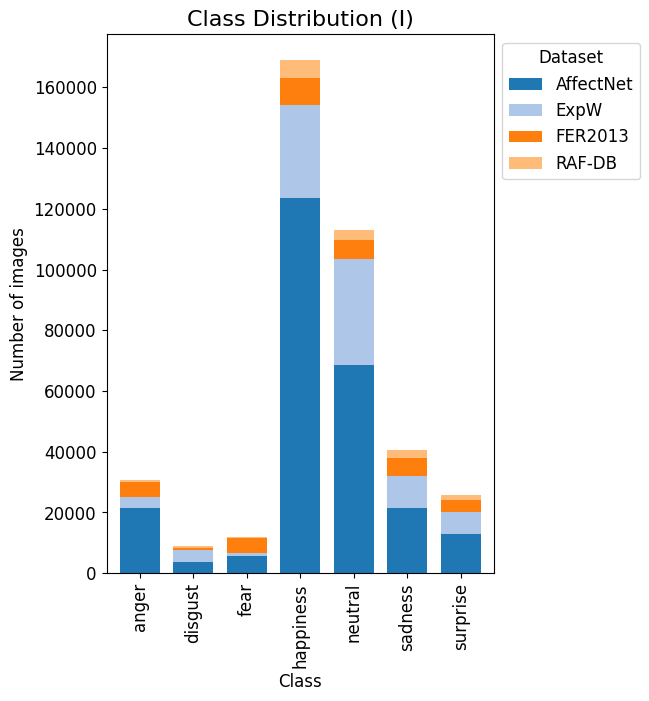

dataset,AffectNet,ExpW,FER2013,RAF-DB
class,,,,
anger,21351,3670,4953,867
disgust,3607,3994,547,877
fear,5523,1088,5121,355
happiness,123561,30530,8987,5956
neutral,68689,34870,6198,3204
sadness,21440,10550,6077,2460
surprise,12997,7056,4002,1617


In [28]:
excluded_datasets = []
# excluded_datasets = ['AffectNet']
# excluded_datasets = ['AffectNet', 'FER2013']
excluded_datasets = ['AffectNet', 'FER2013', 'ExpW', 'RAF-DB']

# Invert excluded datasets
excluded_datasets = [dataset for dataset in df['dataset'].unique() if dataset not in excluded_datasets]

# Filter the DataFrame to exclude 'AffectNet' and 'FER2013' datasets
# filtered_df = df[df['dataset'] == 'AffectNet'] # df[~df['dataset'].isin(excluded_datasets)]
filtered_df = df[~df['dataset'].isin(excluded_datasets)]
# filtered_df = df[df['dataset'].isin(['CK+'])]

# Set random color each dataset using without using color_palette
colors = plt.cm.tab20.colors

# Set default font size and background color for the plot
plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Group by 'class' and 'dataset' and count the occurrences
grouped_df = filtered_df.dropna(subset=['class', 'dataset']).groupby(['class', 'dataset']).size().unstack()
grouped_df = grouped_df.drop(excluded_datasets, axis='columns')

# Plot a stacked bar plot for 'class' using DataFrame's plot.bar
grouped_df.plot.bar(stacked=True, color=colors, figsize=(5, 7), width=0.75)
plt.title('Class Distribution (I)', fontsize=16)
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.xticks(rotation=90)

# Move the legend to the right of the plot
plt.legend(title='Dataset', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
grouped_df

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\3583558824.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.dropna(subset=['class', 'dataset']).groupby(['class', 'dataset']).size().unstack()


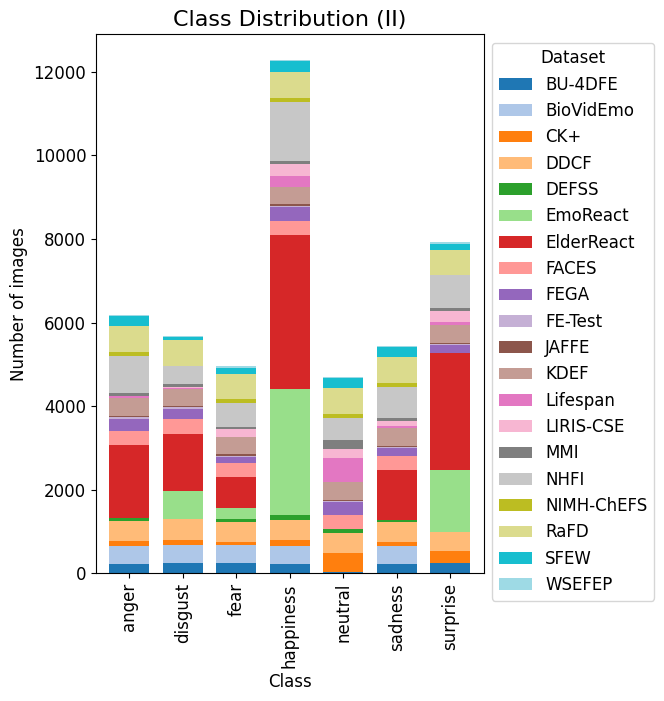

dataset,BU-4DFE,BioVidEmo,CK+,DDCF,DEFSS,EmoReact,ElderReact,FACES,FEGA,FE-Test,JAFFE,KDEF,Lifespan,LIRIS-CSE,MMI,NHFI,NIMH-ChEFS,RaFD,SFEW,WSEFEP
class,,,,,,,,,,,,,,,,,,,,
anger,231,430,116,479,65,0,1741,342,298,30,30,420,59,4,66,890,104,603,251,31
disgust,246,427,130,484,0,677,1379,342,256,30,29,417,7,40,64,439,0,603,87,30
fear,255,426,78,477,71,245,751,342,141,30,32,420,0,174,56,570,106,603,144,30
happiness,227,430,148,480,112,3008,3691,342,327,30,31,420,258,279,84,1406,108,603,271,30
neutral,27,0,457,474,102,0,0,342,295,30,30,417,580,221,212,524,111,603,236,30
sadness,231,425,84,479,54,0,1198,342,175,30,31,420,64,116,64,746,104,603,241,30
surprise,239,0,282,476,0,1474,2805,0,176,30,30,420,78,262,82,775,0,603,153,30


In [29]:
excluded_datasets = []
# excluded_datasets = ['AffectNet']
# excluded_datasets = ['AffectNet', 'FER2013']
excluded_datasets = ['AffectNet', 'FER2013', 'ExpW', 'RAF-DB']

# Invert excluded datasets
# excluded_datasets = [dataset for dataset in df['dataset'].unique() if dataset not in excluded_datasets]

# Filter the DataFrame to exclude 'AffectNet' and 'FER2013' datasets
# filtered_df = df[df['dataset'] == 'AffectNet'] # df[~df['dataset'].isin(excluded_datasets)]
filtered_df = df[~df['dataset'].isin(excluded_datasets)]
# filtered_df = df[df['dataset'].isin(['CK+'])]

# Set random color each dataset using without using color_palette
colors = plt.cm.tab20.colors

# Set default font size and background color for the plot
plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Group by 'class' and 'dataset' and count the occurrences
grouped_df = filtered_df.dropna(subset=['class', 'dataset']).groupby(['class', 'dataset']).size().unstack()
grouped_df = grouped_df.drop(excluded_datasets, axis='columns')

# Plot a stacked bar plot for 'class' using DataFrame's plot.bar
grouped_df.plot.bar(stacked=True, color=colors, figsize=(5, 7), width=0.75)
plt.title('Class Distribution (II)', fontsize=16)
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.xticks(rotation=90)

# Move the legend to the right of the plot
plt.legend(title='Dataset', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
grouped_df

#### By age group

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\5677857.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.dropna(subset=['class', 'age_group_clean']).groupby(['class', 'age_group_clean']).size().unstack()


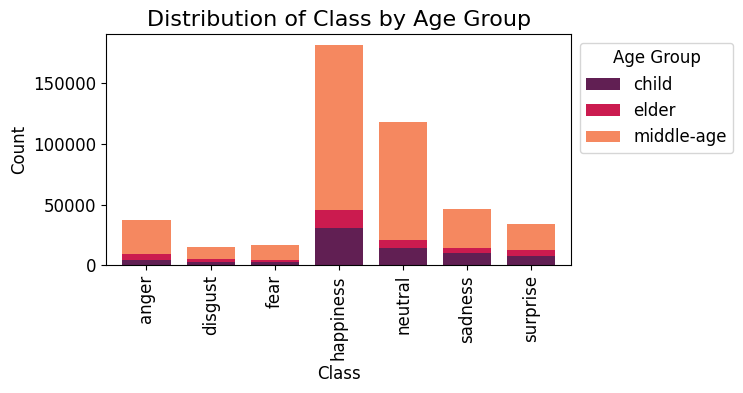

In [41]:
# Set a distinct color palette
colors = sns.color_palette("rocket", len(df['age_group_clean'].unique()))

# Set default font size and background color for the plot
plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Group by 'class' and 'dataset' and count the occurrences
grouped_df = df.dropna(subset=['class', 'age_group_clean']).groupby(['class', 'age_group_clean']).size().unstack()
grouped_df

# Plot a stacked bar plot for 'class' using DataFrame's plot.bar
grouped_df.plot.bar(stacked=True, color=colors, figsize=(6, 3), width=0.75)
plt.title('Distribution of Class by Age Group', fontsize=16)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Move the legend to the right of the plot
plt.legend(title='Age Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

#### By dataset and age group

##### Child

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\303600126.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.dropna(subset=['class', 'dataset']).groupby(['class', 'dataset']).size().unstack()


<Figure size 1200x800 with 0 Axes>

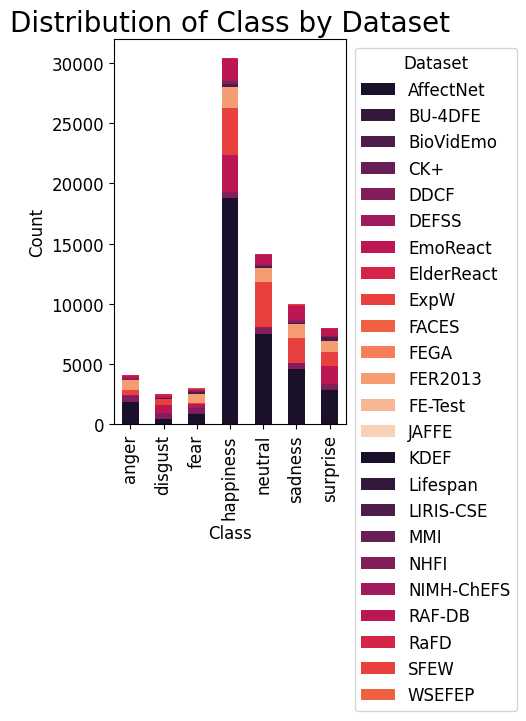

In [42]:
excluded_datasets = []

# Filter the DataFrame to exclude 'AffectNet' and 'FER2013' datasets
filtered_df = df[~df['dataset'].isin(excluded_datasets)]

# Exclude other age_groups
filtered_df = df[df['age_group_clean'] == 'child']

# Set a distinct color palette
colors = sns.color_palette("rocket", len(filtered_df['dataset'].unique()))

# Set default font size and background color for the plot
plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Group by 'class' and 'dataset' and count the occurrences
grouped_df = filtered_df.dropna(subset=['class', 'dataset']).groupby(['class', 'dataset']).size().unstack()
grouped_df = grouped_df.drop(excluded_datasets, axis='columns')

# Plot a stacked bar plot for 'class' using DataFrame's plot.bar
plt.figure(figsize=(12, 8))
grouped_df.plot.bar(stacked=True, color=colors)
plt.title('Distribution of Class by Dataset', fontsize=20)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Move the legend to the right of the plot
plt.legend(title='Dataset', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [43]:
grouped_df

dataset,AffectNet,BU-4DFE,BioVidEmo,CK+,DDCF,DEFSS,EmoReact,ElderReact,ExpW,FACES,...,KDEF,Lifespan,LIRIS-CSE,MMI,NHFI,NIMH-ChEFS,RAF-DB,RaFD,SFEW,WSEFEP
class,,,,,,,,,,,,,,,,,,,,,
anger,1869,0,0,16,479,44,0,0,455,0,...,0,0,4,0,62,104,124,90,15,0
disgust,459,0,0,20,484,0,677,0,429,0,...,0,0,40,0,46,0,167,90,7,0
fear,890,0,0,10,477,49,245,0,128,0,...,0,0,174,0,28,106,47,90,20,0
happiness,18761,0,0,16,480,73,3008,0,3946,0,...,0,0,279,0,230,108,1744,90,8,0
neutral,7468,0,0,52,474,67,0,0,3781,0,...,0,0,221,0,38,111,727,90,11,0
sadness,4601,0,0,14,479,37,0,0,2002,0,...,0,0,116,0,125,104,1192,90,19,0
surprise,2885,0,0,20,476,0,1474,0,1163,0,...,0,0,262,0,87,0,593,90,8,0


##### Middle-Age

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\1264523865.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.dropna(subset=['class', 'dataset']).groupby(['class', 'dataset']).size().unstack()


<Figure size 1200x800 with 0 Axes>

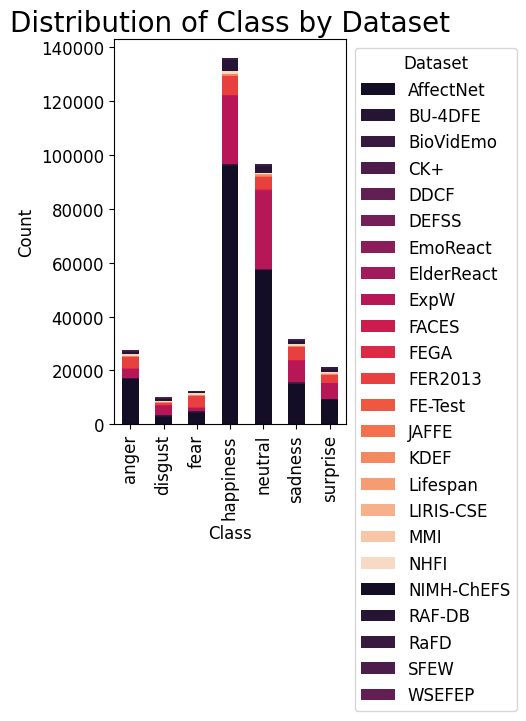

In [44]:
excluded_datasets = []

# Filter the DataFrame to exclude 'AffectNet' and 'FER2013' datasets
filtered_df = df[~df['dataset'].isin(excluded_datasets)]

# Exclude other age_groups
filtered_df = df[df['age_group_clean'] == 'middle-age']

# Set a distinct color palette
colors = sns.color_palette("rocket", len(filtered_df['dataset'].unique()))

# Set default font size and background color for the plot
plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Group by 'class' and 'dataset' and count the occurrences
grouped_df = filtered_df.dropna(subset=['class', 'dataset']).groupby(['class', 'dataset']).size().unstack()
grouped_df = grouped_df.drop(excluded_datasets, axis='columns')

# Plot a stacked bar plot for 'class' using DataFrame's plot.bar
plt.figure(figsize=(12, 8))
grouped_df.plot.bar(stacked=True, color=colors)
plt.title('Distribution of Class by Dataset', fontsize=20)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Move the legend to the right of the plot
plt.legend(title='Dataset', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [45]:
grouped_df

dataset,AffectNet,BU-4DFE,BioVidEmo,CK+,DDCF,DEFSS,EmoReact,ElderReact,ExpW,FACES,...,KDEF,Lifespan,LIRIS-CSE,MMI,NHFI,NIMH-ChEFS,RAF-DB,RaFD,SFEW,WSEFEP
class,,,,,,,,,,,,,,,,,,,,,
anger,16667,231,350,100,0,21,0,0,3027,228,...,420,47,0,66,750,0,736,513,225,31
disgust,2783,246,347,110,0,0,0,0,3301,228,...,417,7,0,64,378,0,696,513,65,30
fear,4304,255,346,68,0,22,0,0,922,228,...,420,0,0,56,525,0,307,513,123,30
happiness,96001,227,350,132,0,39,0,0,25062,228,...,420,174,0,80,1086,0,4106,513,251,30
neutral,57284,27,0,405,0,35,0,0,28954,228,...,417,326,0,208,444,0,2408,513,219,30
sadness,14881,231,345,70,0,17,0,0,7979,228,...,420,55,0,62,557,0,1200,513,220,30
surprise,9060,239,0,262,0,0,0,0,5593,0,...,420,68,0,80,671,0,1006,513,139,30


##### Elder

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\1979798753.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.dropna(subset=['class', 'dataset']).groupby(['class', 'dataset']).size().unstack()


<Figure size 1200x800 with 0 Axes>

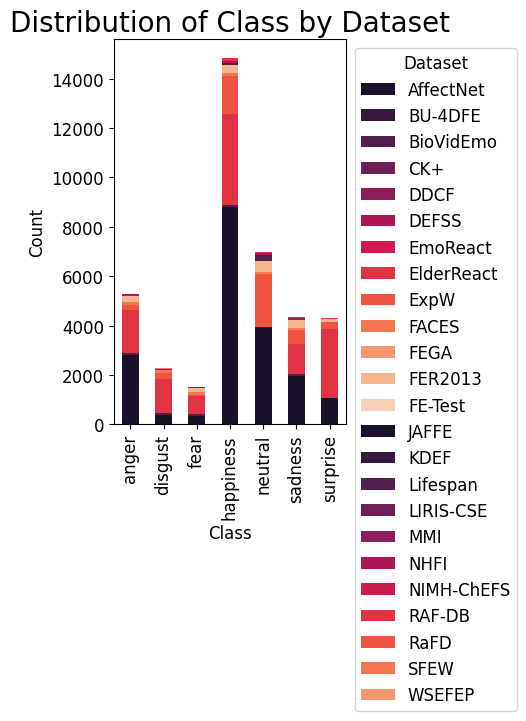

In [46]:
excluded_datasets = []

# Filter the DataFrame to exclude 'AffectNet' and 'FER2013' datasets
filtered_df = df[~df['dataset'].isin(excluded_datasets)]

# Exclude other age_groups
filtered_df = df[df['age_group_clean'] == 'elder']

# Set a distinct color palette
colors = sns.color_palette("rocket", len(filtered_df['dataset'].unique()))

# Set default font size and background color for the plot
plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Group by 'class' and 'dataset' and count the occurrences
grouped_df = filtered_df.dropna(subset=['class', 'dataset']).groupby(['class', 'dataset']).size().unstack()
grouped_df = grouped_df.drop(excluded_datasets, axis='columns')

# Plot a stacked bar plot for 'class' using DataFrame's plot.bar
plt.figure(figsize=(12, 8))
grouped_df.plot.bar(stacked=True, color=colors)
plt.title('Distribution of Class by Dataset', fontsize=20)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Move the legend to the right of the plot
plt.legend(title='Dataset', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [47]:
grouped_df

dataset,AffectNet,BU-4DFE,BioVidEmo,CK+,DDCF,DEFSS,EmoReact,ElderReact,ExpW,FACES,...,KDEF,Lifespan,LIRIS-CSE,MMI,NHFI,NIMH-ChEFS,RAF-DB,RaFD,SFEW,WSEFEP
class,,,,,,,,,,,,,,,,,,,,,
anger,2815,0,80,0,0,0,0,1741,188,114,...,0,12,0,0,78,0,7,0,11,0
disgust,365,0,80,0,0,0,0,1379,264,114,...,0,0,0,0,15,0,14,0,15,0
fear,329,0,80,0,0,0,0,751,38,114,...,0,0,0,0,17,0,1,0,1,0
happiness,8799,0,80,0,0,0,0,3691,1522,114,...,0,84,0,4,90,0,106,0,12,0
neutral,3937,0,0,0,0,0,0,0,2135,114,...,0,254,0,4,42,0,69,0,6,0
sadness,1958,0,80,0,0,0,0,1198,569,114,...,0,9,0,2,64,0,68,0,2,0
surprise,1052,0,0,0,0,0,0,2805,300,0,...,0,10,0,2,17,0,18,0,6,0


### Race

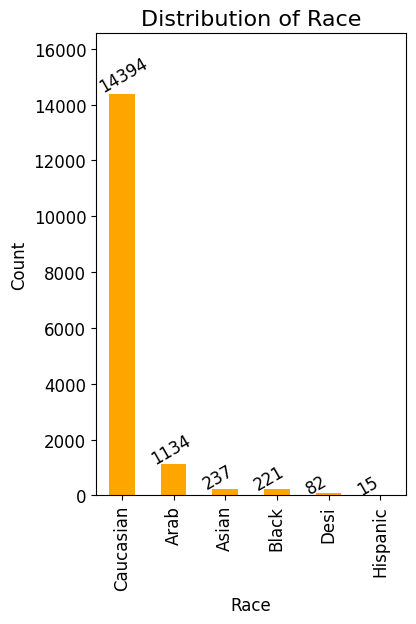

race
Caucasian    14394
Arab          1134
Asian          237
Black          221
Desi            82
Hispanic        15
Name: count, dtype: int64

In [48]:
# Set default font size and background color for the plot
plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Filter the DataFrame to exclude rows with NaN values in 'race'
filtered_df = df.dropna(subset=['race'])

# Plot a bar chart for 'race'
plt.figure(figsize=(4, 6))
value_counts = filtered_df['race'].value_counts()

# Plot the bar chart
ax = value_counts.plot.bar(color='orange')
plt.title('Distribution of Race', fontsize=16)
plt.xlabel('Race')
plt.ylabel('Count')
plt.ylim(0, value_counts.max() * 1.15)
plt.xticks(rotation=90)

# Add values at the top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-.25, p.get_height() * 1.005), rotation=30)

plt.show()
value_counts

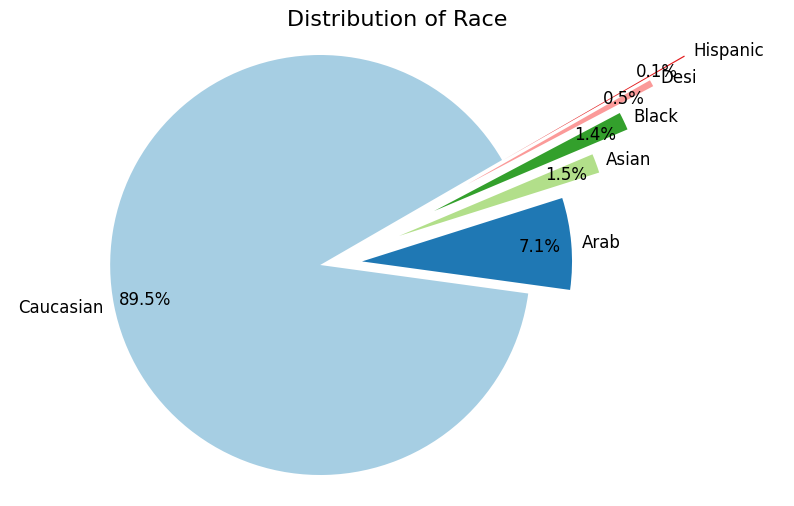

In [49]:
# Set default font size and background color for the plot
plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Filter the DataFrame to exclude rows with NaN values in 'race'
filtered_df = df.dropna(subset=['race'])

# Get the value counts for 'race'
value_counts = filtered_df['race'].value_counts()

# Create an explode array to separate the slices
explode = [0.05] * len(value_counts)
explode[3] = 0.4

explode = np.array(list(range(0, len(value_counts)))) / 5

# Plot a pie chart for 'race'
plt.figure(figsize=(10, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30, colors=plt.cm.Paired.colors, explode=explode, labeldistance=1.05, pctdistance=0.85)
plt.title('Distribution of Race', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\1461887932.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  race_counts_by_dataset = df.groupby(['dataset', 'race']).size().unstack(fill_value=0)


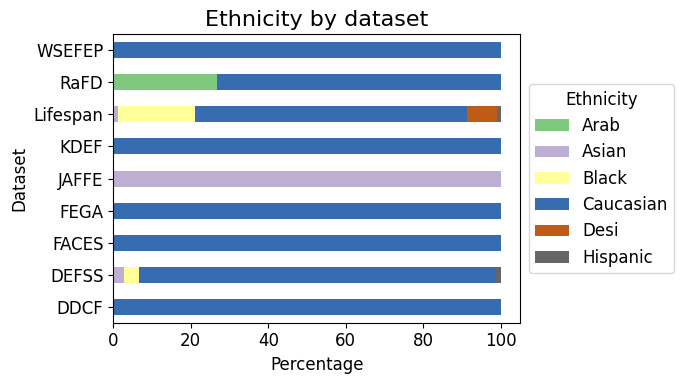

In [50]:
# Capitalize the first letter of each race label
df['race'] = df['race'].str.capitalize()

# Contar las ocurrencias de cada raza en cada dataset
race_counts_by_dataset = df.groupby(['dataset', 'race']).size().unstack(fill_value=0)

# Quitar datasets con valor 0
race_counts_by_dataset = race_counts_by_dataset[race_counts_by_dataset.sum(axis=1) > 0]

# Calcular el porcentaje de cada raza en cada dataset
race_percentage_by_dataset = race_counts_by_dataset.div(race_counts_by_dataset.sum(axis=1), axis=0) * 100

# Convertir los resultados a DataFrames
race_counts_df = race_percentage_by_dataset.reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(7, 4))

# Plot race percentages
race_counts_df.plot(x='dataset', kind='barh', stacked=True, ax=ax, colormap='Accent')
ax.set_title('Ethnicity by dataset', fontsize=16)
ax.set_xlabel('Percentage')
ax.set_ylabel('Dataset')
ax.legend(title='Ethnicity', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

C:\Users\Xavi\AppData\Local\Temp\ipykernel_588\1387534796.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  race_counts_by_dataset = df.groupby(['dataset', 'race']).size().unstack(fill_value=0)


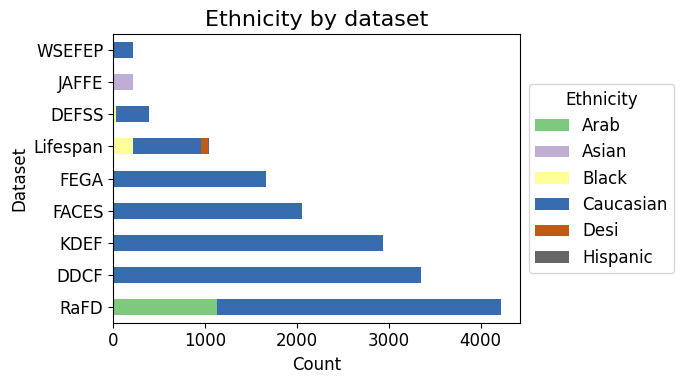

race,dataset,Arab,Asian,Black,Caucasian,Desi,Hispanic
0,RaFD,1134,0,0,3087,0,0
1,DDCF,0,0,0,3349,0,0
2,KDEF,0,0,0,2934,0,0
3,FACES,0,0,0,2052,0,0
4,FEGA,0,0,0,1668,0,0
5,Lifespan,0,13,206,732,82,10
6,DEFSS,0,11,15,361,0,5
7,JAFFE,0,213,0,0,0,0
8,WSEFEP,0,0,0,211,0,0


In [51]:
# Capitalize the first letter of each race label
df['race'] = df['race'].str.capitalize()

# Contar las ocurrencias de cada raza en cada dataset
race_counts_by_dataset = df.groupby(['dataset', 'race']).size().unstack(fill_value=0)

# Quitar datasets con valor 0
race_counts_by_dataset = race_counts_by_dataset[race_counts_by_dataset.sum(axis=1) > 0]

# Ordenar los datasets por el total de ocurrencias en orden descendente
race_counts_by_dataset = race_counts_by_dataset.loc[race_counts_by_dataset.sum(axis=1).sort_values(ascending=False).index]

# Convertir los resultados a DataFrames
race_counts_df = race_counts_by_dataset.reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(7, 4))

# Plot race counts
race_counts_df.plot(x='dataset', kind='barh', stacked=True, ax=ax, colormap='Accent')
ax.set_title('Ethnicity by dataset', fontsize=16)
ax.set_xlabel('Count')
ax.set_ylabel('Dataset')
ax.legend(title='Ethnicity', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()
race_counts_df

### Perspective

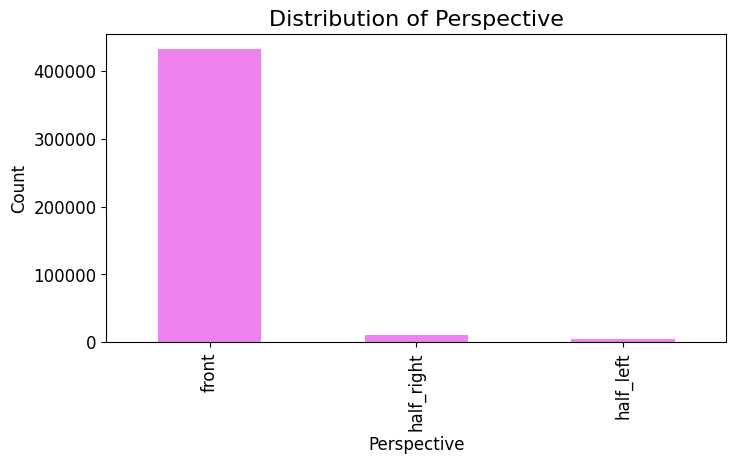

In [52]:
# Set default font size and background color for the plot
plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Filter the DataFrame to exclude rows with NaN values in 'perspective'
filtered_df = df.dropna(subset=['perspective'])

# Plot a bar chart for 'perspective'
plt.figure(figsize=(8, 4))
filtered_df['perspective'].value_counts().plot.bar(color=['violet'])
plt.title('Distribution of Perspective', fontsize=16)
plt.xlabel('Perspective')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

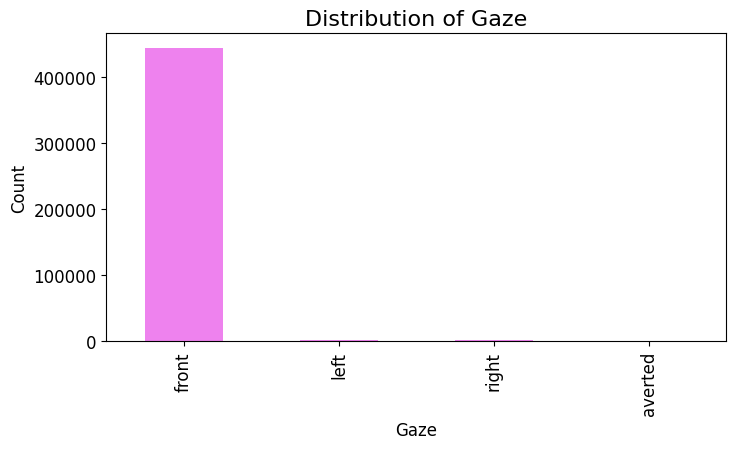

In [53]:
# Set default font size and background color for the plot
plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Filter the DataFrame to exclude rows with NaN values in 'perspective'
filtered_df = df.dropna(subset=['gaze'])

# Plot a bar chart for 'perspective'
plt.figure(figsize=(8, 4))
filtered_df['gaze'].value_counts().plot.bar(color=['violet'])
plt.title('Distribution of Gaze', fontsize=16)
plt.xlabel('Gaze')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()